# E20- Neural Networks in Keras 

Use keras framework to solve the below exercises.


In [1]:
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import backend as K
from sklearn import preprocessing
from livelossplot import PlotLossesKeras
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


## 20.1 Predicting Student Admissions with Neural Networks

In this notebook, we predict student admissions to graduate schools based on six pieces of data:

1. GRE Scores (Test)
2. TOEFL Scores (Test)
3. University Ranking (1-5)
4. Statement of Purpose (SOP) and Letter of Recommendation Strength ( out of 5 )
5. Undergraduate GPA Scores (Grades)
6. Research Experience ( either 0 or 1 )

**Exercise:** Design and train a shallow neural network to predict the chance of Admission for each entry. Choose the number of hidden layer and neurons that minimizes the error. 

In [2]:
# Import dataset

data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [4]:
X = data.drop(data.columns[-1], axis=1)
Y = data[data.columns[-1]]

In [5]:
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

In [8]:
output_var = 1
print(output_var, ' output variables')

dims = xTrain.shape[1]
print(dims, 'input variables')

1  output variables
7 input variables


In [9]:
K.clear_session()
print("Building model...")

print('Model variables: ', dims)

Building model...
Model variables:  7


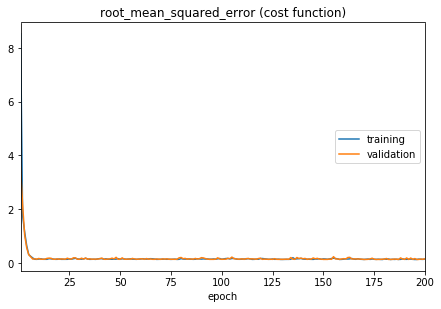

root_mean_squared_error (cost function):
training   (min:    0.125, max:    8.526, cur:    0.141)
validation (min:    0.127, max:    3.544, cur:    0.154)
--------------------------->
150/150 [==============================] - 0s 0us/step
root mean squared error 0.15381296892960866
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 8         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 10        
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 36        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 7         
Total params: 61
Trainable params: 61
Non-trainable params: 0
_____________________________________________________________

In [10]:
print("Building model...")

print('Model variables: ', dims)
K.clear_session()

model = Sequential()
model.add(Dense(output_var, input_shape=(dims,)))

model.add(Dense(5, input_dim=2, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='linear'))


learning_rate = 0.01
#op = opts.SGD(lr=learning_rate)
#op= 'rmsprop'
op = 'adam'

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 
    
model.compile(loss = root_mean_squared_error
             ,optimizer = op,
             )

model.fit(xTrain, yTrain,
          verbose=2, 
          epochs=200, 
          validation_data=[xTest,yTest],
          callbacks=[PlotLossesKeras()])

print("--------------------------->")
score = model.evaluate(xTest, yTest)
print('root mean squared error',score)
print(model.summary())

# 20.2 Decision Boundary --  Moons Dataset 

**Exercise:** Use keras framework to find a decision boundary for point in the make_moons.

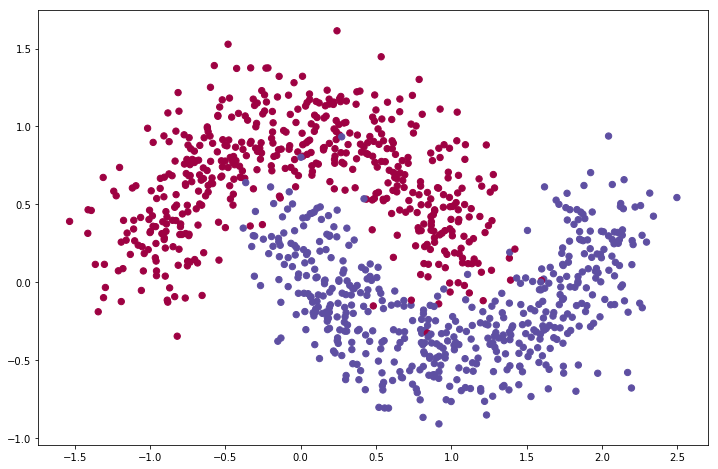

In [11]:
# Create moons dataset.

from sklearn.datasets.samples_generator import make_moons

x_train, y_train = make_moons(n_samples=1000, noise= 0.2, random_state=3)
plt.figure(figsize=(12, 8))
plt.scatter(x_train[:, 0], x_train[:,1], c=y_train, s=40, cmap=plt.cm.Spectral);

**Hint:** Use the next function to plt the decision boundary,

In [14]:
X1 = [X[0] for X in x_train]
X2 = [X[1] for X in x_train]

X_ = np.array([X1,X2])
Y_ = np.array([y_train])

# Scaling data
std_scale = preprocessing.StandardScaler().fit(X_)

X = pd.DataFrame({'X1':X1,'X2':X2})
Y = pd.DataFrame({'Y':y_train})

In [15]:
dims = X.shape[1]

In [16]:
print("Building model...")

print('Model variables: ', dims)
K.clear_session()
model = Sequential()
model.add(Dense(1, input_shape=(dims,)))

model.add(Dense(4, input_dim=2, activation='relu'))
model.add(Dense(4, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')
model.fit(X, Y, verbose=2,epochs=2000)

Building model...
Model variables:  2
Instructions for updating:
Use tf.cast instead.
Epoch 1/2000
 - 1s - loss: 0.6973
Epoch 2/2000
 - 0s - loss: 0.6929
Epoch 3/2000
 - 0s - loss: 0.6914
Epoch 4/2000
 - 0s - loss: 0.6902
Epoch 5/2000
 - 0s - loss: 0.6884
Epoch 6/2000
 - 0s - loss: 0.6859
Epoch 7/2000
 - 0s - loss: 0.6821
Epoch 8/2000
 - 0s - loss: 0.6769
Epoch 9/2000
 - 0s - loss: 0.6701
Epoch 10/2000
 - 0s - loss: 0.6616
Epoch 11/2000
 - 0s - loss: 0.6521
Epoch 12/2000
 - 0s - loss: 0.6419
Epoch 13/2000
 - 0s - loss: 0.6316
Epoch 14/2000
 - 0s - loss: 0.6215
Epoch 15/2000
 - 0s - loss: 0.6113
Epoch 16/2000
 - 0s - loss: 0.6016
Epoch 17/2000
 - 0s - loss: 0.5914
Epoch 18/2000
 - 0s - loss: 0.5820
Epoch 19/2000
 - 0s - loss: 0.5727
Epoch 20/2000
 - 0s - loss: 0.5640
Epoch 21/2000
 - 0s - loss: 0.5556
Epoch 22/2000
 - 0s - loss: 0.5473
Epoch 23/2000
 - 0s - loss: 0.5395
Epoch 24/2000
 - 0s - loss: 0.5320
Epoch 25/2000
 - 0s - loss: 0.5246
Epoch 26/2000
 - 0s - loss: 0.5174
Epoch 27/2000

 - 0s - loss: 0.2738
Epoch 224/2000
 - 0s - loss: 0.2737
Epoch 225/2000
 - 0s - loss: 0.2736
Epoch 226/2000
 - 0s - loss: 0.2740
Epoch 227/2000
 - 0s - loss: 0.2735
Epoch 228/2000
 - 0s - loss: 0.2734
Epoch 229/2000
 - 0s - loss: 0.2735
Epoch 230/2000
 - 0s - loss: 0.2736
Epoch 231/2000
 - 0s - loss: 0.2732
Epoch 232/2000
 - 0s - loss: 0.2732
Epoch 233/2000
 - 0s - loss: 0.2731
Epoch 234/2000
 - 0s - loss: 0.2732
Epoch 235/2000
 - 0s - loss: 0.2730
Epoch 236/2000
 - 0s - loss: 0.2734
Epoch 237/2000
 - 0s - loss: 0.2731
Epoch 238/2000
 - 0s - loss: 0.2728
Epoch 239/2000
 - 0s - loss: 0.2728
Epoch 240/2000
 - 0s - loss: 0.2726
Epoch 241/2000
 - 0s - loss: 0.2727
Epoch 242/2000
 - 0s - loss: 0.2726
Epoch 243/2000
 - 0s - loss: 0.2723
Epoch 244/2000
 - 0s - loss: 0.2724
Epoch 245/2000
 - 0s - loss: 0.2724
Epoch 246/2000
 - 0s - loss: 0.2725
Epoch 247/2000
 - 0s - loss: 0.2726
Epoch 248/2000
 - 0s - loss: 0.2724
Epoch 249/2000
 - 0s - loss: 0.2724
Epoch 250/2000
 - 0s - loss: 0.2720
Epoch 2

Epoch 451/2000
 - 0s - loss: 0.2685
Epoch 452/2000
 - 0s - loss: 0.2687
Epoch 453/2000
 - 0s - loss: 0.2683
Epoch 454/2000
 - 0s - loss: 0.2682
Epoch 455/2000
 - 0s - loss: 0.2686
Epoch 456/2000
 - 0s - loss: 0.2685
Epoch 457/2000
 - 0s - loss: 0.2682
Epoch 458/2000
 - 0s - loss: 0.2683
Epoch 459/2000
 - 0s - loss: 0.2680
Epoch 460/2000
 - 0s - loss: 0.2685
Epoch 461/2000
 - 0s - loss: 0.2681
Epoch 462/2000
 - 0s - loss: 0.2681
Epoch 463/2000
 - 0s - loss: 0.2683
Epoch 464/2000
 - 0s - loss: 0.2687
Epoch 465/2000
 - 0s - loss: 0.2681
Epoch 466/2000
 - 0s - loss: 0.2682
Epoch 467/2000
 - 0s - loss: 0.2682
Epoch 468/2000
 - 0s - loss: 0.2683
Epoch 469/2000
 - 0s - loss: 0.2681
Epoch 470/2000
 - 0s - loss: 0.2685
Epoch 471/2000
 - 0s - loss: 0.2681
Epoch 472/2000
 - 0s - loss: 0.2683
Epoch 473/2000
 - 0s - loss: 0.2684
Epoch 474/2000
 - 0s - loss: 0.2683
Epoch 475/2000
 - 0s - loss: 0.2683
Epoch 476/2000
 - 0s - loss: 0.2685
Epoch 477/2000
 - 0s - loss: 0.2682
Epoch 478/2000
 - 0s - loss:

Epoch 679/2000
 - 0s - loss: 0.2675
Epoch 680/2000
 - 0s - loss: 0.2676
Epoch 681/2000
 - 0s - loss: 0.2677
Epoch 682/2000
 - 0s - loss: 0.2675
Epoch 683/2000
 - 0s - loss: 0.2677
Epoch 684/2000
 - 0s - loss: 0.2676
Epoch 685/2000
 - 0s - loss: 0.2675
Epoch 686/2000
 - 0s - loss: 0.2674
Epoch 687/2000
 - 0s - loss: 0.2677
Epoch 688/2000
 - 0s - loss: 0.2674
Epoch 689/2000
 - 0s - loss: 0.2677
Epoch 690/2000
 - 0s - loss: 0.2678
Epoch 691/2000
 - 0s - loss: 0.2679
Epoch 692/2000
 - 0s - loss: 0.2675
Epoch 693/2000
 - 0s - loss: 0.2677
Epoch 694/2000
 - 0s - loss: 0.2674
Epoch 695/2000
 - 0s - loss: 0.2676
Epoch 696/2000
 - 0s - loss: 0.2675
Epoch 697/2000
 - 0s - loss: 0.2674
Epoch 698/2000
 - 0s - loss: 0.2675
Epoch 699/2000
 - 0s - loss: 0.2676
Epoch 700/2000
 - 0s - loss: 0.2678
Epoch 701/2000
 - 0s - loss: 0.2676
Epoch 702/2000
 - 0s - loss: 0.2675
Epoch 703/2000
 - 0s - loss: 0.2678
Epoch 704/2000
 - 0s - loss: 0.2675
Epoch 705/2000
 - 0s - loss: 0.2675
Epoch 706/2000
 - 0s - loss:

Epoch 907/2000
 - 0s - loss: 0.2673
Epoch 908/2000
 - 0s - loss: 0.2677
Epoch 909/2000
 - 0s - loss: 0.2671
Epoch 910/2000
 - 0s - loss: 0.2675
Epoch 911/2000
 - 0s - loss: 0.2673
Epoch 912/2000
 - 0s - loss: 0.2672
Epoch 913/2000
 - 0s - loss: 0.2671
Epoch 914/2000
 - 0s - loss: 0.2672
Epoch 915/2000
 - 0s - loss: 0.2672
Epoch 916/2000
 - 0s - loss: 0.2673
Epoch 917/2000
 - 0s - loss: 0.2676
Epoch 918/2000
 - 0s - loss: 0.2673
Epoch 919/2000
 - 0s - loss: 0.2680
Epoch 920/2000
 - 0s - loss: 0.2679
Epoch 921/2000
 - 0s - loss: 0.2672
Epoch 922/2000
 - 0s - loss: 0.2673
Epoch 923/2000
 - 0s - loss: 0.2674
Epoch 924/2000
 - 0s - loss: 0.2672
Epoch 925/2000
 - 0s - loss: 0.2674
Epoch 926/2000
 - 0s - loss: 0.2674
Epoch 927/2000
 - 0s - loss: 0.2672
Epoch 928/2000
 - 0s - loss: 0.2673
Epoch 929/2000
 - 0s - loss: 0.2673
Epoch 930/2000
 - 0s - loss: 0.2675
Epoch 931/2000
 - 0s - loss: 0.2671
Epoch 932/2000
 - 0s - loss: 0.2673
Epoch 933/2000
 - 0s - loss: 0.2673
Epoch 934/2000
 - 0s - loss:

Epoch 1131/2000
 - 0s - loss: 0.2669
Epoch 1132/2000
 - 0s - loss: 0.2670
Epoch 1133/2000
 - 0s - loss: 0.2669
Epoch 1134/2000
 - 0s - loss: 0.2672
Epoch 1135/2000
 - 0s - loss: 0.2672
Epoch 1136/2000
 - 0s - loss: 0.2673
Epoch 1137/2000
 - 0s - loss: 0.2673
Epoch 1138/2000
 - 0s - loss: 0.2671
Epoch 1139/2000
 - 0s - loss: 0.2671
Epoch 1140/2000
 - 0s - loss: 0.2672
Epoch 1141/2000
 - 0s - loss: 0.2670
Epoch 1142/2000
 - 0s - loss: 0.2677
Epoch 1143/2000
 - 0s - loss: 0.2674
Epoch 1144/2000
 - 0s - loss: 0.2675
Epoch 1145/2000
 - 0s - loss: 0.2670
Epoch 1146/2000
 - 0s - loss: 0.2672
Epoch 1147/2000
 - 0s - loss: 0.2669
Epoch 1148/2000
 - 0s - loss: 0.2670
Epoch 1149/2000
 - 0s - loss: 0.2670
Epoch 1150/2000
 - 0s - loss: 0.2670
Epoch 1151/2000
 - 0s - loss: 0.2673
Epoch 1152/2000
 - 0s - loss: 0.2672
Epoch 1153/2000
 - 0s - loss: 0.2670
Epoch 1154/2000
 - 0s - loss: 0.2673
Epoch 1155/2000
 - 0s - loss: 0.2673
Epoch 1156/2000
 - 0s - loss: 0.2670
Epoch 1157/2000
 - 0s - loss: 0.2675
E

 - 0s - loss: 0.2671
Epoch 1353/2000
 - 0s - loss: 0.2668
Epoch 1354/2000
 - 0s - loss: 0.2667
Epoch 1355/2000
 - 0s - loss: 0.2668
Epoch 1356/2000
 - 0s - loss: 0.2669
Epoch 1357/2000
 - 0s - loss: 0.2667
Epoch 1358/2000
 - 0s - loss: 0.2669
Epoch 1359/2000
 - 0s - loss: 0.2668
Epoch 1360/2000
 - 0s - loss: 0.2670
Epoch 1361/2000
 - 0s - loss: 0.2669
Epoch 1362/2000
 - 0s - loss: 0.2668
Epoch 1363/2000
 - 0s - loss: 0.2667
Epoch 1364/2000
 - 0s - loss: 0.2670
Epoch 1365/2000
 - 0s - loss: 0.2671
Epoch 1366/2000
 - 0s - loss: 0.2667
Epoch 1367/2000
 - 0s - loss: 0.2669
Epoch 1368/2000
 - 0s - loss: 0.2670
Epoch 1369/2000
 - 0s - loss: 0.2668
Epoch 1370/2000
 - 0s - loss: 0.2666
Epoch 1371/2000
 - 0s - loss: 0.2668
Epoch 1372/2000
 - 0s - loss: 0.2670
Epoch 1373/2000
 - 0s - loss: 0.2669
Epoch 1374/2000
 - 0s - loss: 0.2668
Epoch 1375/2000
 - 0s - loss: 0.2671
Epoch 1376/2000
 - 0s - loss: 0.2670
Epoch 1377/2000
 - 0s - loss: 0.2669
Epoch 1378/2000
 - 0s - loss: 0.2666
Epoch 1379/2000
 

Epoch 1574/2000
 - 0s - loss: 0.2663
Epoch 1575/2000
 - 0s - loss: 0.2664
Epoch 1576/2000
 - 0s - loss: 0.2663
Epoch 1577/2000
 - 0s - loss: 0.2664
Epoch 1578/2000
 - 0s - loss: 0.2663
Epoch 1579/2000
 - 0s - loss: 0.2664
Epoch 1580/2000
 - 0s - loss: 0.2662
Epoch 1581/2000
 - 0s - loss: 0.2662
Epoch 1582/2000
 - 0s - loss: 0.2664
Epoch 1583/2000
 - 0s - loss: 0.2663
Epoch 1584/2000
 - 0s - loss: 0.2663
Epoch 1585/2000
 - 0s - loss: 0.2665
Epoch 1586/2000
 - 0s - loss: 0.2664
Epoch 1587/2000
 - 0s - loss: 0.2662
Epoch 1588/2000
 - 0s - loss: 0.2669
Epoch 1589/2000
 - 0s - loss: 0.2665
Epoch 1590/2000
 - 0s - loss: 0.2666
Epoch 1591/2000
 - 0s - loss: 0.2663
Epoch 1592/2000
 - 0s - loss: 0.2666
Epoch 1593/2000
 - 0s - loss: 0.2663
Epoch 1594/2000
 - 0s - loss: 0.2664
Epoch 1595/2000
 - 0s - loss: 0.2663
Epoch 1596/2000
 - 0s - loss: 0.2663
Epoch 1597/2000
 - 0s - loss: 0.2663
Epoch 1598/2000
 - 0s - loss: 0.2665
Epoch 1599/2000
 - 0s - loss: 0.2662
Epoch 1600/2000
 - 0s - loss: 0.2663
E

 - 0s - loss: 0.2665
Epoch 1796/2000
 - 0s - loss: 0.2661
Epoch 1797/2000
 - 0s - loss: 0.2663
Epoch 1798/2000
 - 0s - loss: 0.2662
Epoch 1799/2000
 - 0s - loss: 0.2668
Epoch 1800/2000
 - 0s - loss: 0.2661
Epoch 1801/2000
 - 0s - loss: 0.2662
Epoch 1802/2000
 - 0s - loss: 0.2660
Epoch 1803/2000
 - 0s - loss: 0.2661
Epoch 1804/2000
 - 0s - loss: 0.2662
Epoch 1805/2000
 - 0s - loss: 0.2660
Epoch 1806/2000
 - 0s - loss: 0.2661
Epoch 1807/2000
 - 0s - loss: 0.2661
Epoch 1808/2000
 - 0s - loss: 0.2660
Epoch 1809/2000
 - 0s - loss: 0.2662
Epoch 1810/2000
 - 0s - loss: 0.2659
Epoch 1811/2000
 - 0s - loss: 0.2662
Epoch 1812/2000
 - 0s - loss: 0.2661
Epoch 1813/2000
 - 0s - loss: 0.2661
Epoch 1814/2000
 - 0s - loss: 0.2662
Epoch 1815/2000
 - 0s - loss: 0.2661
Epoch 1816/2000
 - 0s - loss: 0.2662
Epoch 1817/2000
 - 0s - loss: 0.2663
Epoch 1818/2000
 - 0s - loss: 0.2661
Epoch 1819/2000
 - 0s - loss: 0.2666
Epoch 1820/2000
 - 0s - loss: 0.2664
Epoch 1821/2000
 - 0s - loss: 0.2663
Epoch 1822/2000
 

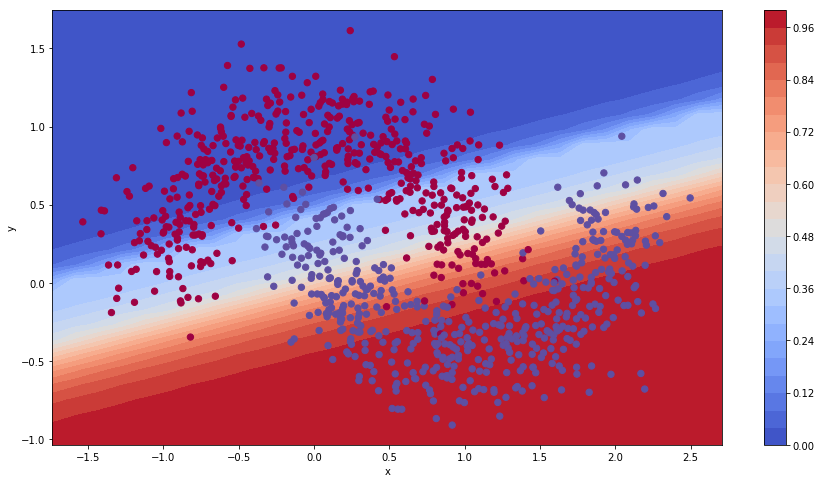

In [17]:
def plot_decision_region(model, X, pred_fun):
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 30)
    y_vals = np.linspace(min_y, max_y, 30)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            '''
            Here 'model' is the neural network you previous trained.
            '''
            ZZ[i, j] = pred_fun(model, XX[i, j], YY[i, j])
    plt.contourf(XX, YY, ZZ, 30, cmap = plt.cm.coolwarm, vmin= 0, vmax=1)
    plt.colorbar()
    plt.xlabel("x")
    plt.ylabel("y")
    
def pred_fun(model,x1, x2):
    '''
    Here 'model' is the neural network you previous trained.
    '''
    xval = np.array([[x1, x2]])
    return model.predict(xval)[0, 0]

plt.figure(figsize=(15, 8))   
'''
Here 'model' is the neural network you previous trained.
'''
plot_decision_region(model, np.array(X), pred_fun)
#plot_data(x_train, y_train)
plt.scatter(X.X1, X.X2, c=Y.Y, s=40, cmap=plt.cm.Spectral)